nombre de valeurs recues:  150528
Nombre de termes différents de 0 : 50176


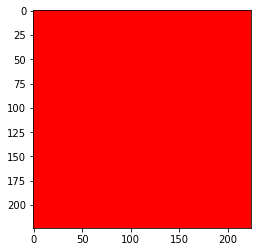

In [79]:
import serial
import numpy as np
import matplotlib.pyplot as plt

# Serial port configuration
port = '/dev/ttyUSB0'
baudrate = 115200
timeout = 10

# Open the serial port
ser = serial.Serial(port, baudrate, timeout=timeout)

# # Load buffer to send
# buffer_length = 100
# buffer = []
# for i in range(0, buffer_length):
#     buffer.append(170)

# # Send buffer
# for i in range(0, buffer_length):
#     ser.write(buffer[i].to_bytes(1, byteorder='big'))

# # Close the serial port
# ser.close()

# print(f"Data sent")

# File to save the received audio data
filename = 'received_data.txt'

# Open the text file to save the received data
# with open(filename, 'wb') as f:


def convert_to_int8(data):
    # Décoder les données en chaîne de caractères
    data_str = data.decode('latin1')  # Utiliser latin1 pour obtenir les valeurs brutes

    if data_str.startswith('\\x'):
        # Traitement des données hexadécimales
        hex_value = data_str[2:]  # Enlever le préfixe \x
        value = int(hex_value, 16)
    else:
        # Traitement des données ASCII
        value = ord(data_str)
    
    # Assurer que la valeur est dans la plage de int8 (-128 à 127)
    # Note : int8 est signé, donc le code ci-dessous assure l'ajustement correct
    #return value + 256 if value > 127 else value
    return value

image_shape = (224, 224, 3)
image_size = 224*224*3
image = np.zeros(image_size, dtype=np.int16)
i = 0

while True:
    # Read data from the serial port
    data = ser.read()
    #print("data: ", data)
    if (data == b''):
        break
    image[i] = convert_to_int8(data)
    #print("data: ", image[i])
    i = i + 1
    

ser.close()

np.set_printoptions(threshold = np.inf)
print("nombre de valeurs recues: ", i)

count_non_zero = len([x for x in image if x != 0])
print(f'Nombre de termes différents de 0 : {count_non_zero}')
#print(image)

reshaped_image = np.reshape(image, image_shape)
#print(reshaped_image)

plt.imshow(reshaped_image)

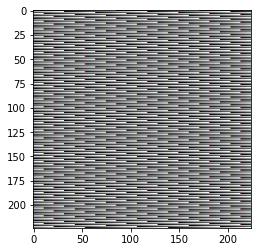

In [78]:
import matplotlib.pyplot as plt

plt.imshow(reshaped_image)